# K - Means Clustering

## Create a K - Means Clustering algorithm to group customers of a retail store based on their purchase history.

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [229]:
data= pd.read_csv(r'C:\Users\HP\Documents\Datasets\Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [233]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [235]:
data.shape

(200, 5)

In [237]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [239]:
data.duplicated().sum()

0

In [241]:
z_score= stats.zscore(data.select_dtypes('int'))
outlier= np.where(np.abs(z_score) > 3)
#np.abs(z_scores) takes the absolute value of each Z-score
#np.where() returns indices of array where the condition is true. It will return indices of data points that are outliers
print(outlier)

(array([], dtype=int64), array([], dtype=int64))


<Axes: >

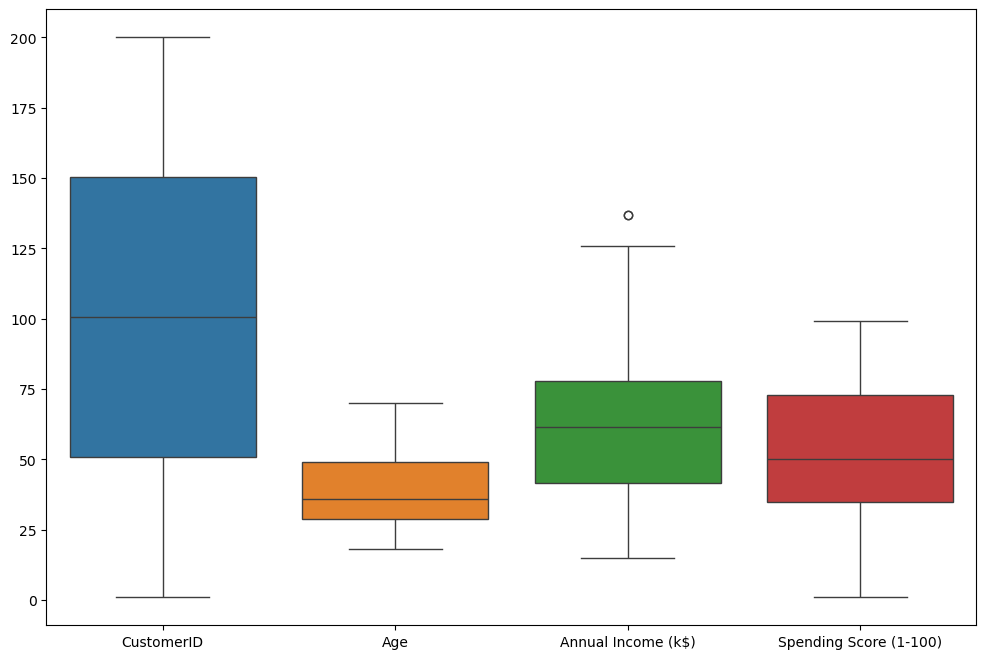

In [243]:
plt.figure(figsize= (12,8))
sns.boxplot(data)

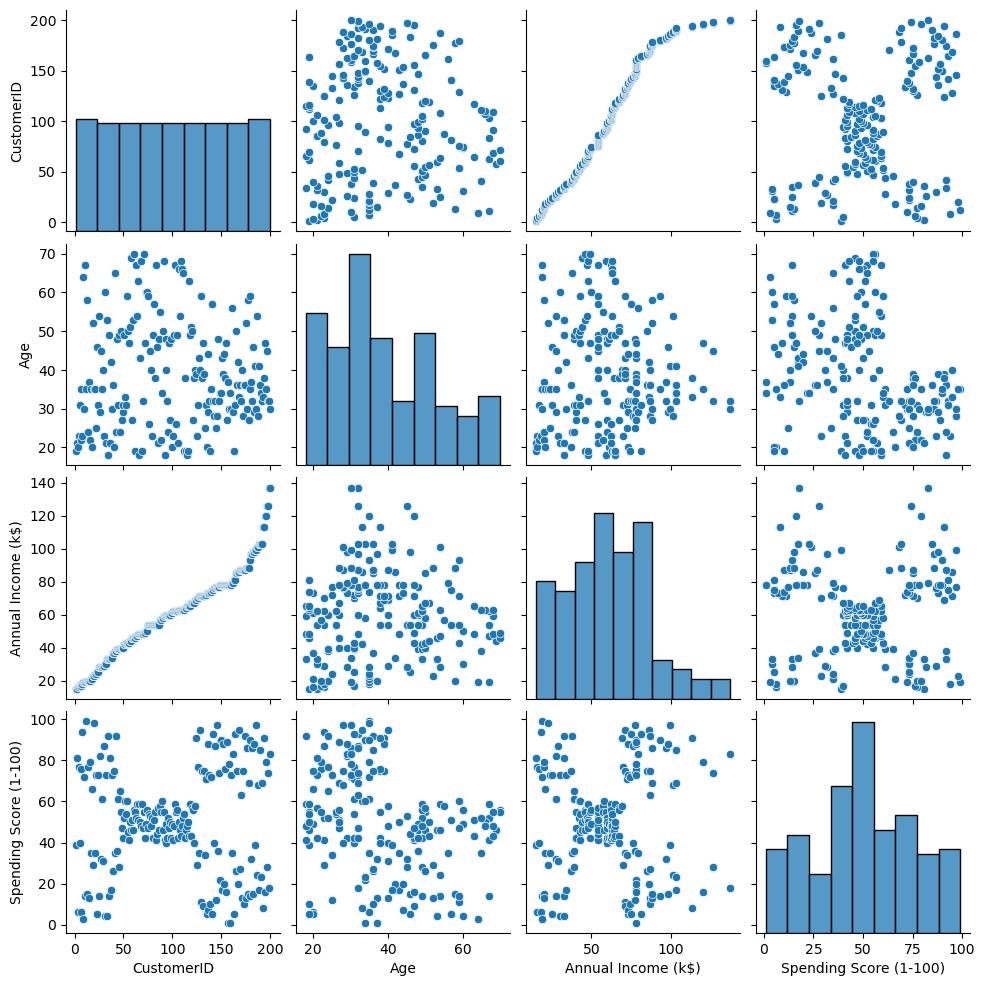

In [244]:
sns.pairplot(data= data)

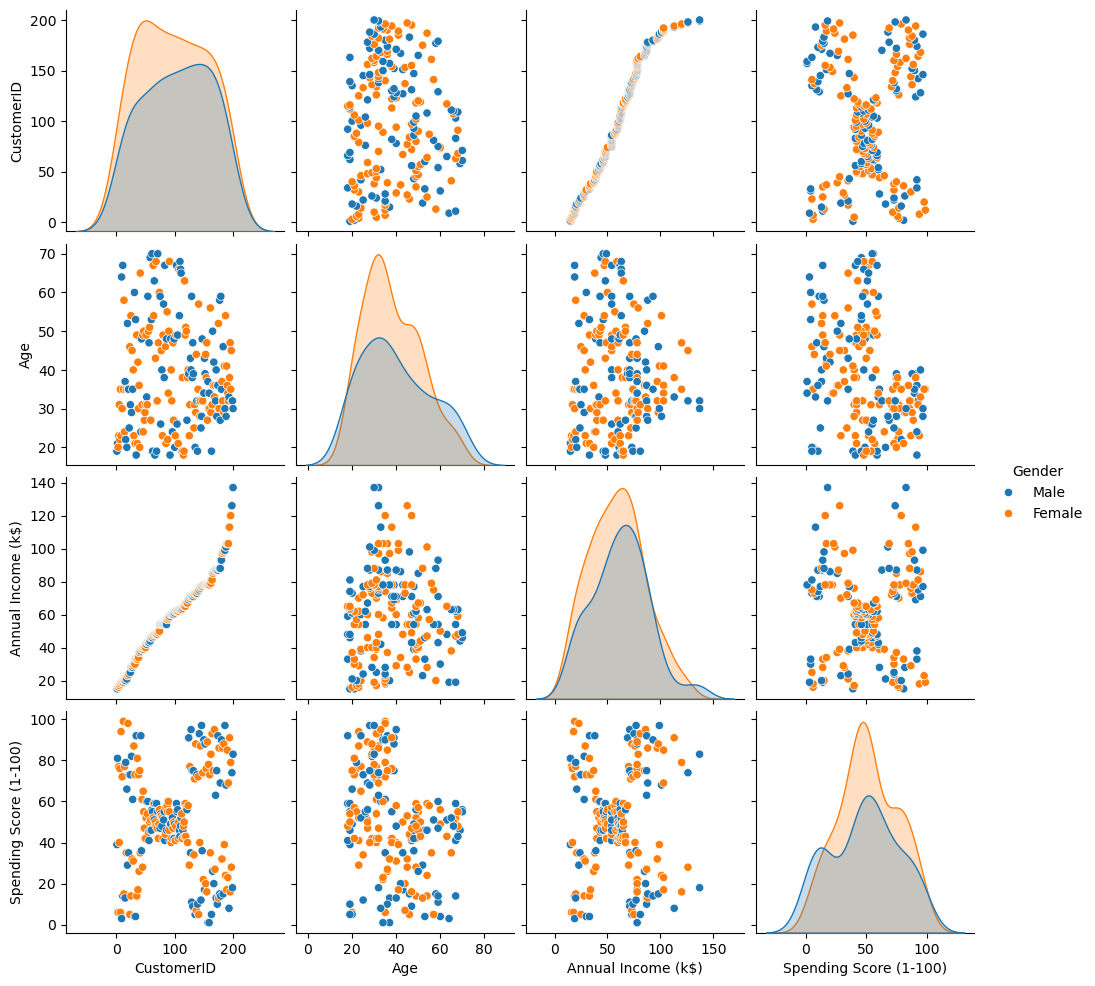

In [245]:
sns.pairplot(data= data, hue= 'Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

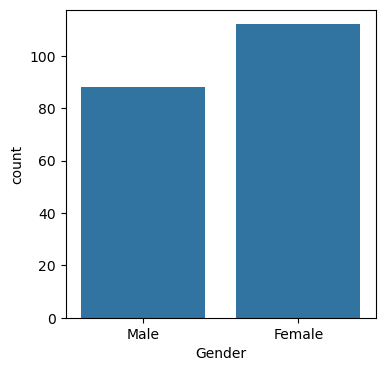

In [247]:
plt.figure(figsize= (4,4))
sns.countplot(data= data, x= 'Gender')
plt.show

C:\Users\HP\AppData\Local\Temp\ipykernel_2300\2905685691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], ax= ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_2300\2905685691.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'], ax= ax[1])
C:\Users\HP\App

Text(0.5, 1.0, 'Spending Score')

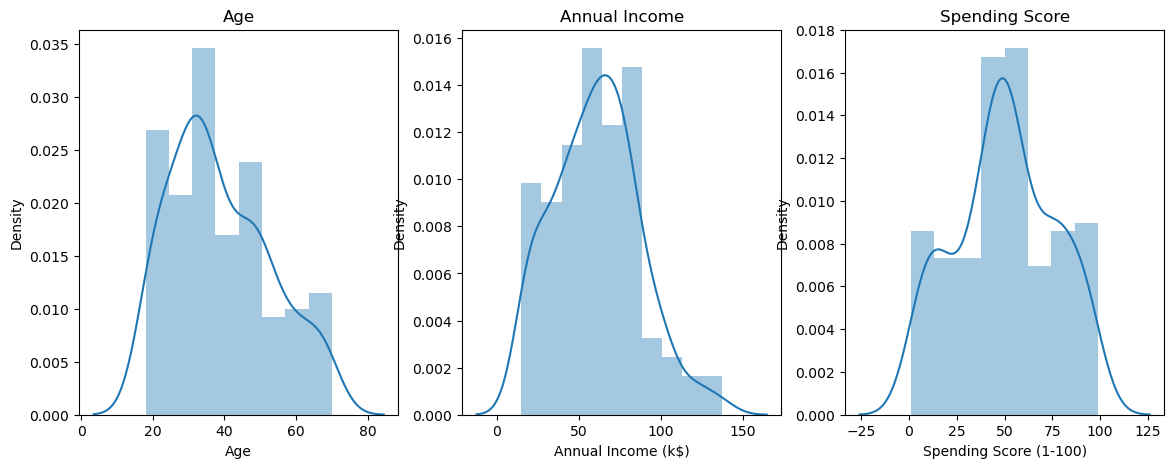

In [248]:
fig, ax= plt.subplots(1, 3, figsize= (14,5))
sns.distplot(data['Age'], ax= ax[0])
ax[0].set_title('Age')

sns.distplot(data['Annual Income (k$)'], ax= ax[1])
ax[1].set_title('Annual Income')

sns.distplot(data['Spending Score (1-100)'], ax= ax[2])
ax[2].set_title('Spending Score')

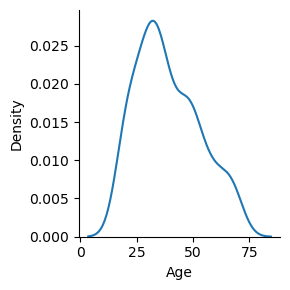

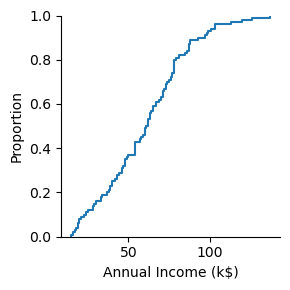

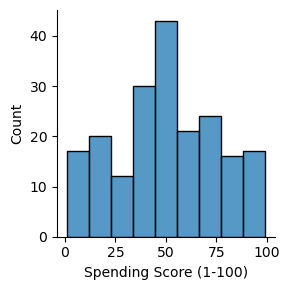

In [249]:
sns.displot(data['Age'], kind= 'kde', height= 3)
sns.displot(data['Annual Income (k$)'], kind= 'ecdf', height= 3)
sns.displot(data['Spending Score (1-100)'], kind= 'hist', height= 3)

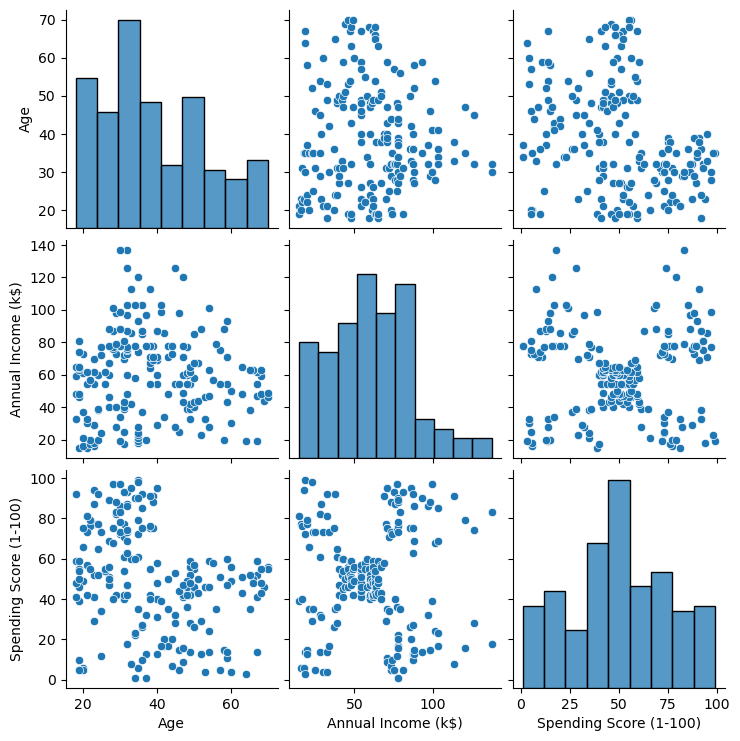

In [250]:
sns.pairplot(data[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])
# sns.pairplot(data[['Age', 'Annual Income (k$)','Spending Score (1-100)']]) both give same output

In [251]:
data['Gender']= data['Gender'].map({'Male': 0, 'Female': 1})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


<Axes: >

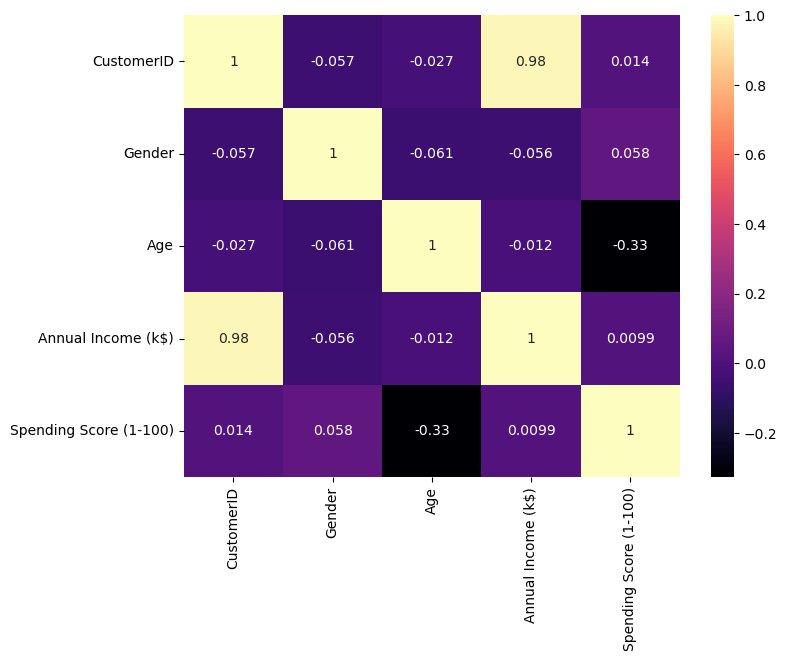

In [252]:
plt.figure(figsize= (8,6))
sns.heatmap(data.corr(), cmap= 'magma', annot= True)

Text(0.5, 1.0, 'Gender vs Spending Score (1-100)')

<Figure size 600x600 with 0 Axes>

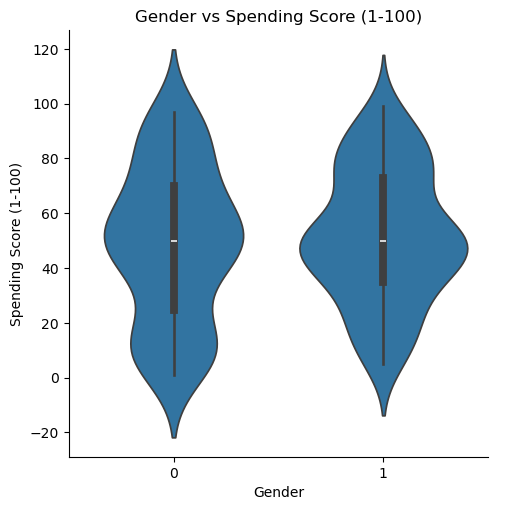

In [253]:
plt.figure(figsize= (6,6))
sns.catplot(x= 'Gender', y= 'Spending Score (1-100)', kind= 'violin', data= data)
#It displays density of Gender with SpendingScore in form of violin, with inner part of the violin showing quartiles and the median of the data
plt.title('Gender vs Spending Score (1-100)')

Text(0.5, 1.0, 'Gender vs Spending Score (1-100)')

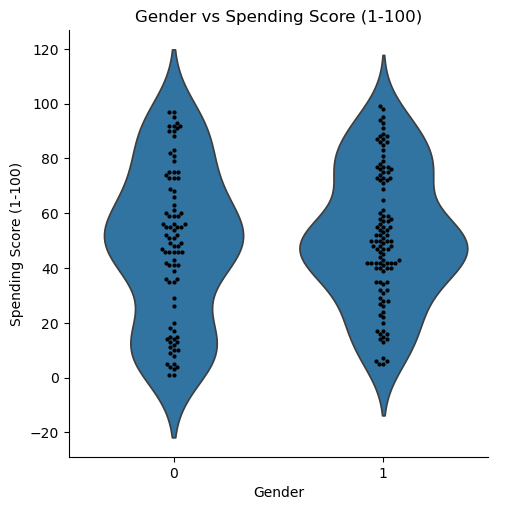

In [254]:
g= sns.catplot(x= "Gender", y= "Spending Score (1-100)", kind= "violin", inner= None, data= data)
#First line creates violin plot where inner=None means no internal elements (like box plots or KDE plots) will be drawn
# inner= ('quart', 'stick', 'point', None); inner can have these values

sns.swarmplot(x= "Gender", y= "Spending Score (1-100)", color= "k", size= 3, data= data)
#Second line adds a swarmplot on top of the existing violin plot
#Swarmplot shows individual data points as dots (with jitter) showing distribution of data.

plt.title('Gender vs Spending Score (1-100)')

Text(0.5, 1.0, 'Gender vs Annual Income (k$)')

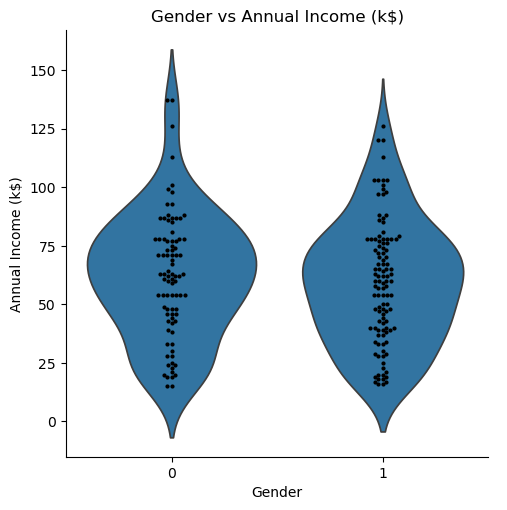

In [255]:
g= sns.catplot(x= "Gender", y= "Annual Income (k$)", kind= "violin", inner= None, data= data)
sns.swarmplot(x= "Gender", y= "Annual Income (k$)", color= "k", size= 3, data= data)
plt.title('Gender vs Annual Income (k$)')

Text(0.5, 1.0, 'Gender vs Age')

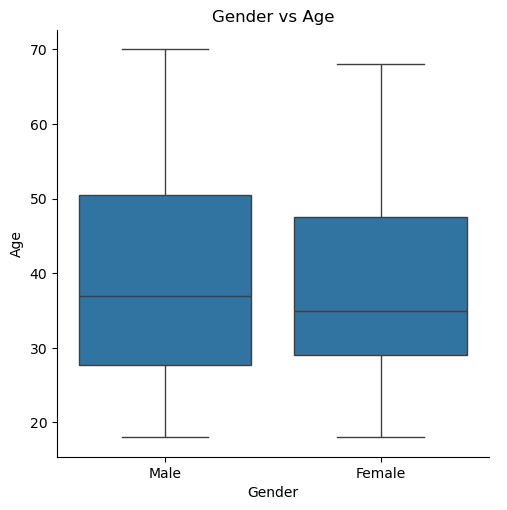

In [256]:
sns.catplot(x= "Gender", y= "Age", kind= "box", data= data)
plt.xticks([0,1], ['Male','Female'])
plt.title('Gender vs Age')

In [257]:
x= data.iloc[:, -2:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [258]:
# WCSS/Inertia quantifies how tight the clusters are, based on the sum of squared distances between each data point and its assigned cluster centroid.
# Low WCSS/Inertia means that the clusters are compact and well-separated.
# High WCSS/Inertia means that the clusters are more spread out and less distinct.
# WCSS - (Within-Cluster Sum of Squares)
wcss = []
sil_score = []

# Starting from 2 because atleast 2 features are needed for making clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(x, kmeans.labels_))
    
# Silhouette Score measures how well each data point fits into its assigned cluster. 
# It tells how close points within a cluster are (cohesion) and how distinct a cluster is from others (separation)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

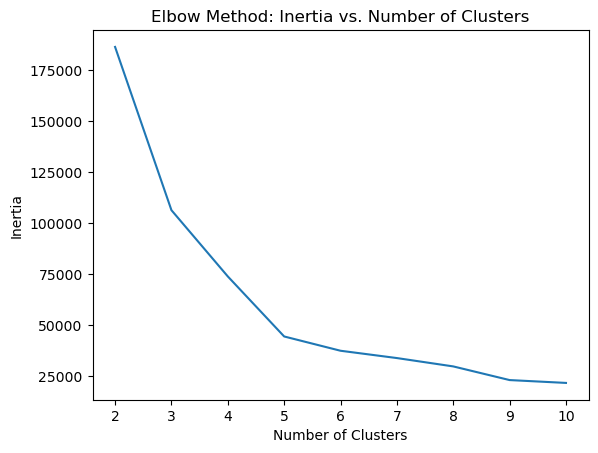

In [259]:
sns.lineplot(x= range(2, 11), y= wcss)
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

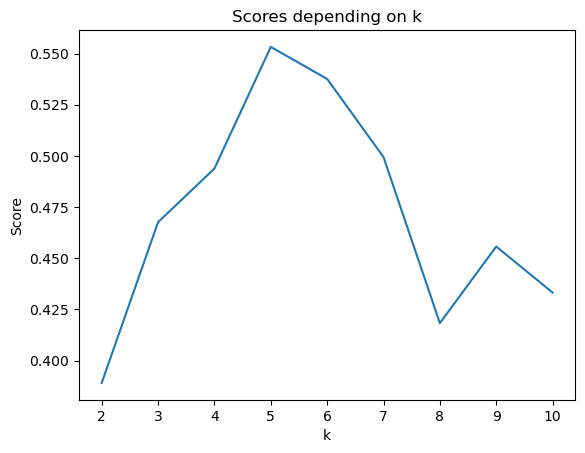

In [260]:
# Silhouette Score ranges from -1 to +1
# +1: Perfect clustering.
# 0: The data point is on or very near the decision boundary between two clusters.
# -1: Poor clustering.

# Calculating silhouette score for different values of k and choose the value of k that maximizes silhouette score helps choose best no. of clusters
sns.lineplot(x= range(2, 11), y= sil_score)
plt.title('Scores depending on k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [261]:
X = data.iloc[:, -3:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [262]:
wcss = []
sil_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(X, kmeans.labels_))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

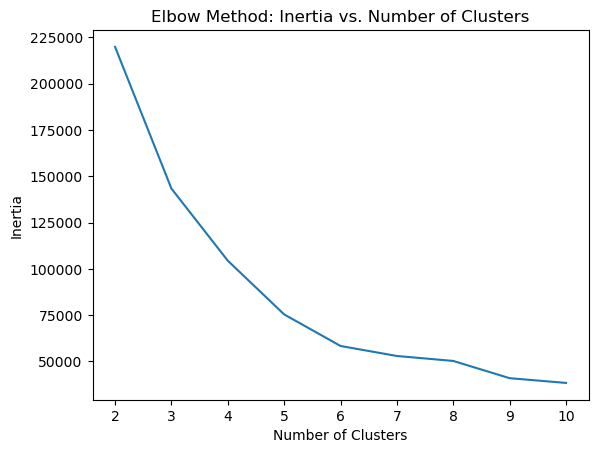

In [263]:
sns.lineplot(x= range(2, 11), y= wcss)
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

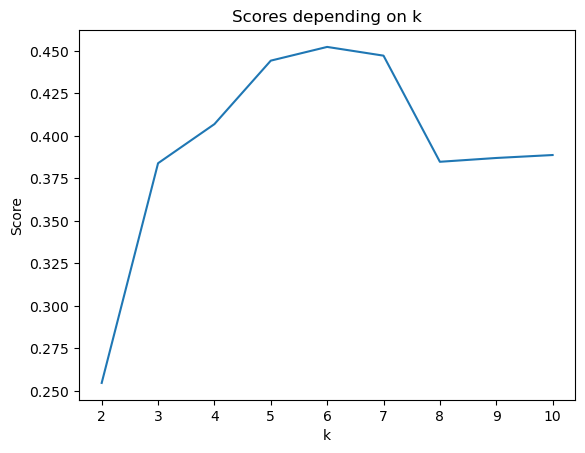

In [264]:
sns.lineplot(x= range(2, 11), y= sil_score)
plt.title('Scores depending on k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [265]:
df = data.iloc[:, -4:]
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [266]:
wcss = []
sil_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df, kmeans.labels_))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

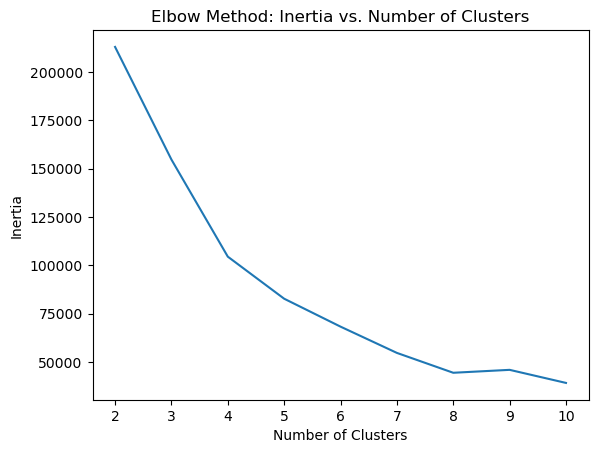

In [267]:
sns.lineplot(x= range(2, 11), y= wcss)
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

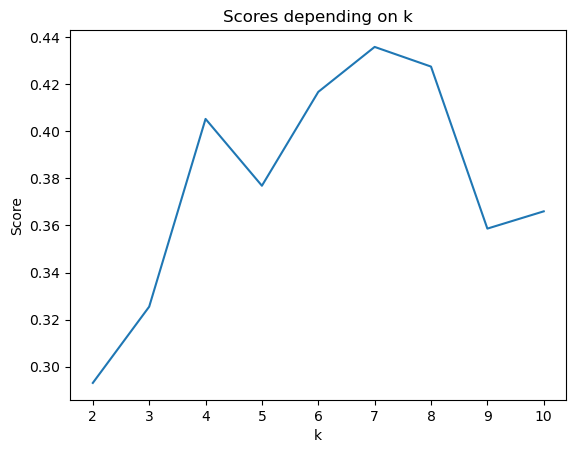

In [269]:
sns.lineplot(x= range(2, 11), y= sil_score)
plt.title('Scores depending on k')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [270]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [271]:
labels= kmeans.labels_
labels

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, 4, 1,
       4, 5, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [272]:
centroids= kmeans.cluster_centers_
centroids

array([[ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.65789474, 27.        , 56.65789474, 49.13157895],
       [ 0.56818182, 56.34090909, 53.70454545, 49.38636364],
       [ 0.42857143, 41.68571429, 88.22857143, 17.28571429],
       [ 0.59090909, 44.31818182, 25.77272727, 20.27272727],
       [ 0.59090909, 25.27272727, 25.72727273, 79.36363636]])

In [273]:
# The number of clusters is set to 6 (n_clusters= 6), but the scatter plot is created using only two features.
# This is purely for visualization—even though the K-means algorithm is working with all 4 features, 
# the plot simplifies things by reducing the data to two features for easier viewing.

Text(0.5, 1.0, 'Annual Income vs Spending Score')

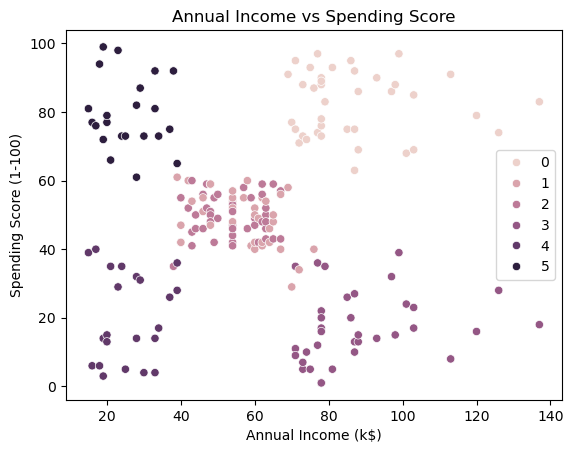

In [274]:
sns.scatterplot(data= df, x= df.iloc[:, 2], y= df.iloc[:, 3], hue= labels)
plt.title('Annual Income vs Spending Score')

Text(0.5, 1.0, 'Age vs Spending Score')

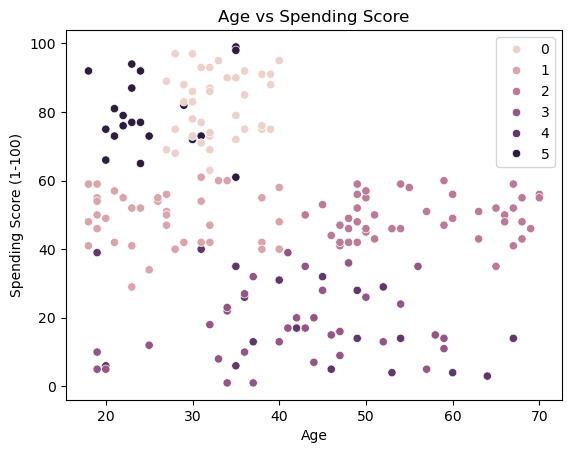

In [275]:
sns.scatterplot(data= df, x= df.iloc[:, 1], y= df.iloc[:, 3], hue= labels)
plt.title('Age vs Spending Score')

Text(0.5, 1.0, 'Gender vs Spending Score')

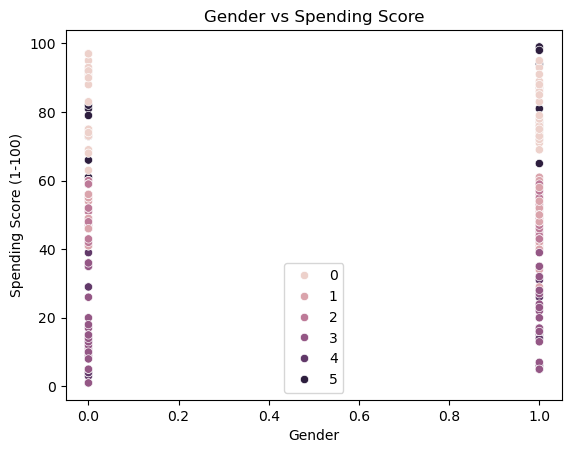

In [276]:
sns.scatterplot(data= df, x= df.iloc[:, 0], y= df.iloc[:, 3], hue= labels)
plt.title('Gender vs Spending Score')

Text(0.5, 1.0, 'Age vs Annual Income')

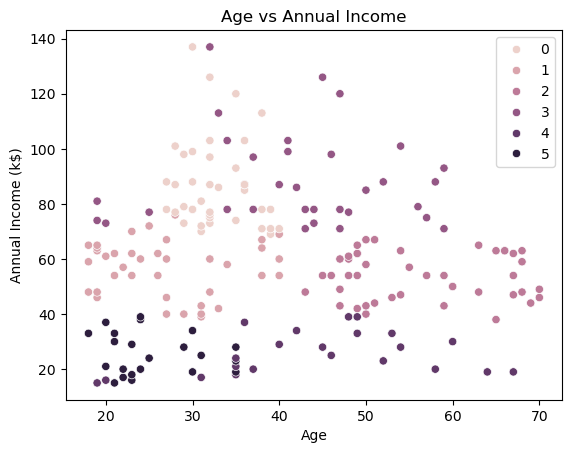

In [277]:
sns.scatterplot(data= df, x= df.iloc[:, 1], y= df.iloc[:, 2], hue= labels)
plt.title('Age vs Annual Income')

Text(0.5, 1.0, 'Annual Income vs Gender')

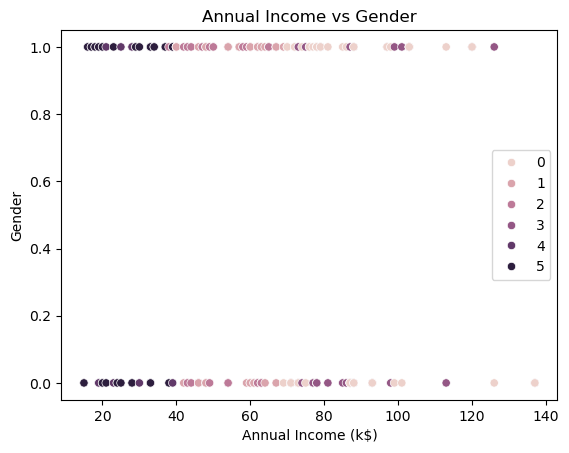

In [278]:
sns.scatterplot(data= df, x= df.iloc[:, 2], y= df.iloc[:, 0], hue= labels)
plt.title('Annual Income vs Gender')

Text(0.5, 1.0, 'Gender vs Age')

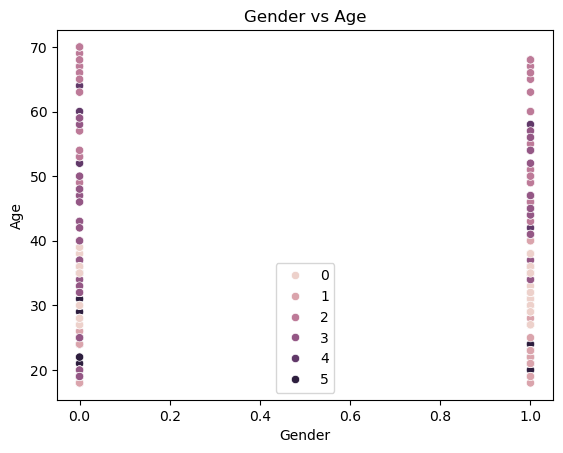

In [279]:
sns.scatterplot(data= df, x= df.iloc[:, 0], y= df.iloc[:, 1], hue= labels)
plt.title('Gender vs Age')

In [280]:
# K-means clustering is performed on the original 4 features and it assigns each data point to one of the 6 clusters 
# based on the full set of features (i.e., the 4-dimensional space)
# PCA is used to reduce the dimensions of the data to 2 or 3, for visualization purposes. 
# PCA transforms the data into new dimensions(principal components) that capture the most important variations(variance) from the original data
# Even though the visualization is in a lower-dimensional space (2D or 3D), the clusters are still based on all 4 features, 
# so the relationships between the features remain embedded in the cluster assignment.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


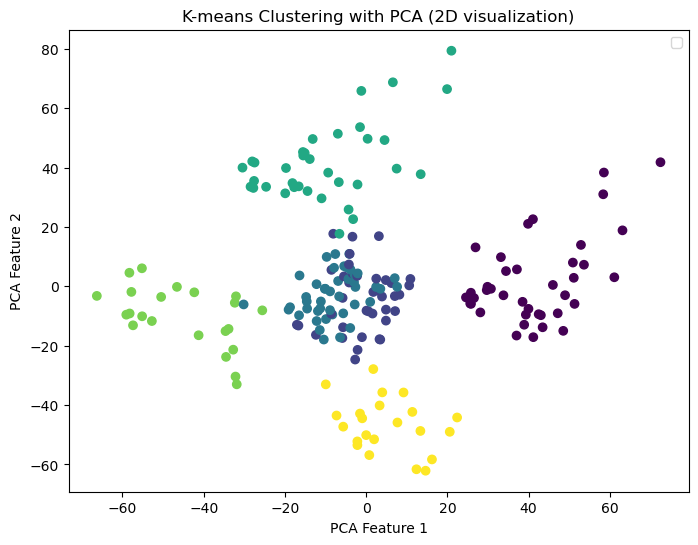

In [281]:
# To visualize the clusters using all 4 features in a 2D scatter plot, PCA (Principal Component Analysis) is applied
# to reduce the 4-dimensional data into 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Visualize the clusters (using the 2D PCA projection)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering with PCA (2D visualization)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

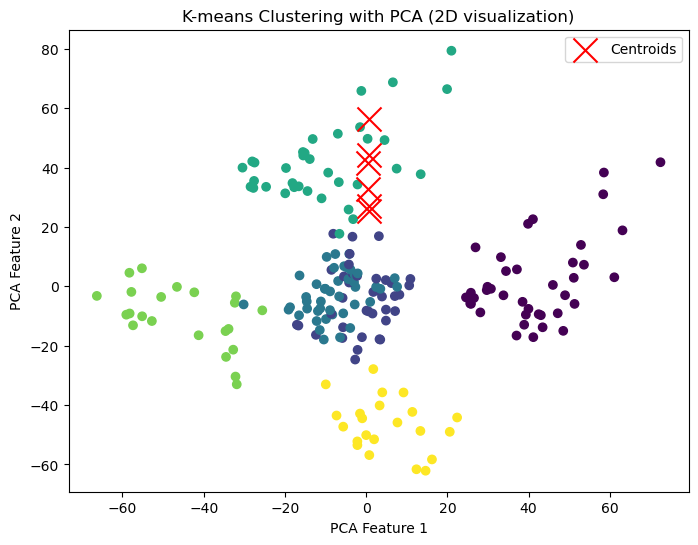

In [282]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering with PCA (2D visualization)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


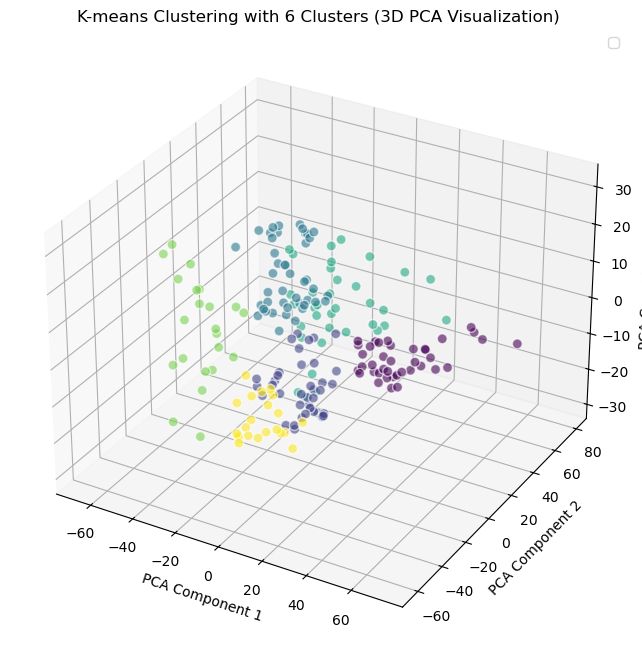

In [283]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(df)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
#ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='red', marker='X', label='Centroids')
ax.set_title('K-means Clustering with 6 Clusters (3D PCA Visualization)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

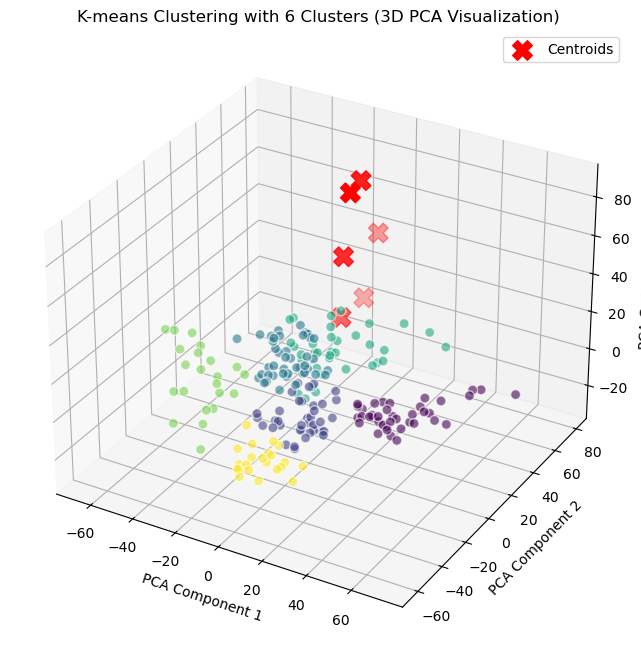

In [285]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(df)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='red', marker='X', label='Centroids')
ax.set_title('K-means Clustering with 6 Clusters (3D PCA Visualization)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

# END OF PROJECT